In [1]:
import pandas as pd
from pyspark.sql import SparkSession
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import keras

In [2]:
spark = SparkSession.builder.master('local').appName('ML').getOrCreate()

In [3]:
df = spark.read.csv('sonar_data.csv')

In [5]:
df.show()

+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+----+
|   _c0|   _c1|   _c2|   _c3|   _c4|   _c5|   _c6|   _c7|   _c8|   _c9|  _c10|  _c11|  _c12|  _c13|  _c14|  _c15|  _c16|  _c17|  _c18|  _c19|  _c20|  _c21|  _c22|  _c23|  _c24|  _c25|  _c26|  _c27|  _c28|  _c29|  _c30|  _c31|  _c32|  _c33|  _c34|  _c35|  _c36|  _c37|  _c38|  _c39|  _c40|  _c41|  _c42|  _c43|  _c44|  _c45|  _c46|  _c47|  _c48|  _c49|  _c50|  _c51|  _c52|  _c53|  _c54|  _c55|  _c56|  _c57|  _c58|  _c59|_c60|
+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----

In [6]:
dataset = df.toPandas()
dataset

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,...,_c51,_c52,_c53,_c54,_c55,_c56,_c57,_c58,_c59,_c60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [7]:
shuffled_df = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
# X = shuffled_df.iloc[:, :-1].values
# y = shuffled_df.iloc[:, -1].values

In [102]:
shuffled_df

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,...,_c51,_c52,_c53,_c54,_c55,_c56,_c57,_c58,_c59,_c60
0,0.0305,0.0363,0.0214,0.0227,0.0456,0.0665,0.0939,0.0972,0.2535,0.3127,...,0.0200,0.0070,0.0070,0.0086,0.0089,0.0074,0.0042,0.0055,0.0021,1
1,0.0298,0.0615,0.0650,0.0921,0.1615,0.2294,0.2176,0.2033,0.1459,0.0852,...,0.0031,0.0153,0.0071,0.0212,0.0076,0.0152,0.0049,0.0200,0.0073,0
2,0.0139,0.0222,0.0089,0.0108,0.0215,0.0136,0.0659,0.0954,0.0786,0.1015,...,0.0062,0.0072,0.0113,0.0012,0.0022,0.0025,0.0059,0.0039,0.0048,0
3,0.0181,0.0146,0.0026,0.0141,0.0421,0.0473,0.0361,0.0741,0.1398,0.1045,...,0.0223,0.0255,0.0145,0.0233,0.0041,0.0018,0.0048,0.0089,0.0085,0
4,0.0411,0.0277,0.0604,0.0525,0.0489,0.0385,0.0611,0.1117,0.1237,0.2300,...,0.0217,0.0038,0.0019,0.0065,0.0132,0.0108,0.0050,0.0085,0.0044,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0331,0.0423,0.0474,0.0818,0.0835,0.0756,0.0374,0.0961,0.0548,0.0193,...,0.0078,0.0174,0.0176,0.0038,0.0129,0.0066,0.0044,0.0134,0.0092,1
204,0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,...,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062,0
205,0.0260,0.0192,0.0254,0.0061,0.0352,0.0701,0.1263,0.1080,0.1523,0.1630,...,0.0118,0.0120,0.0051,0.0070,0.0015,0.0035,0.0008,0.0044,0.0077,0
206,0.0394,0.0420,0.0446,0.0551,0.0597,0.1416,0.0956,0.0802,0.1618,0.2558,...,0.0146,0.0040,0.0114,0.0032,0.0062,0.0101,0.0068,0.0053,0.0087,1


In [9]:
shuffled_df['_c60'] = (shuffled_df['_c60'] == 'M').astype(int)

In [10]:
keras.utils.set_random_seed(42)

In [86]:
number_samples = len(shuffled_df)
index_80th = round(number_samples * 0.8)

In [87]:
train_data = shuffled_df.iloc[0:index_80th]
test_data = shuffled_df.iloc[index_80th:]

In [88]:
train_label = train_data['_c60'].to_numpy()
train_features = train_data.drop(columns=['_c60'])
test_label = test_data['_c60'].to_numpy()
test_features = test_data.drop(columns=['_c60'])

In [89]:
input_features = list(train_features.columns)

In [113]:
len(test_features.columns)

60

In [91]:
def create_model(
    learning_rate: float,
    input_features: list[str],
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
    """Create and compile a simple binary classification model."""
    model_inputs = [
        keras.Input(name=feature, shape=(1,)) for feature in input_features
    ]
    concatenated_inputs = keras.layers.Concatenate()(model_inputs)

    model_output = keras.layers.Dense(
        units=1,
        name='dense_layer',
        activation=keras.activations.sigmoid
    )(concatenated_inputs)

    model = keras.Model(inputs=model_inputs, outputs=model_output)

    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics
    )

    return model


def train_model(
    model: keras.Model,
    dataset: pd.DataFrame,
    labels: np.ndarray,
    input_features: list[str],
    batch_size: int,
    number_epochs: int,
    experiment_name: str = "default_experiment"
) -> dict:
    """Train the given Keras model on the provided dataset and labels."""

    # Prepare features dictionary
    features = {
        feature_name: np.array(dataset[feature_name], dtype=np.float32)
        for feature_name in input_features
    }

    # Train model
    history = model.fit(
        x=features,
        y=labels,
        batch_size=batch_size,
        epochs=number_epochs,
        verbose=1
    )

    # Return experiment results
    return {
        "experiment_name": experiment_name,
        "model": model,
        "epochs_run": history.epoch,
        "metrics_history": pd.DataFrame(history.history)
    }

In [92]:
classification_threshold=0.5
learning_rate=0.001
number_epochs=60
batch_size=100

metrics = [
    keras.metrics.BinaryAccuracy(
        name='accuracy', threshold=classification_threshold
    ),
    keras.metrics.Precision(
        name='precision', thresholds=classification_threshold
    ),
    keras.metrics.Recall(
        name='recall', thresholds=classification_threshold
    ),
    keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
model = create_model(learning_rate, input_features, metrics)

# Train the model on the training set.
experiment = train_model(
    model,train_features, train_label, input_features, batch_size, number_epochs, 'baseline'
)


Epoch 1/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5367 - auc: 0.5344 - loss: 0.6947 - precision: 0.5314 - recall: 1.0000 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5514 - auc: 0.5402 - loss: 0.6910 - precision: 0.5395 - recall: 1.0000
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5628 - auc: 0.5534 - loss: 0.6890 - precision: 0.5458 - recall: 1.0000
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5815 - auc: 0.5540 - loss: 0.6875 - precision: 0.5567 - recall: 1.0000
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6043 - auc: 0.5622 - loss: 0.6862 - precision: 0.5709 - recall: 0.9922
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6076 - auc: 0.5686 - loss: 0.6850 - precision: 0.5736 - recall: 0.9845
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6002 - auc: 0.5654 - loss: 0.6839 - precision: 0.5702 - recall: 0.9706
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 

In [93]:
from matplotlib import pyplot as plt

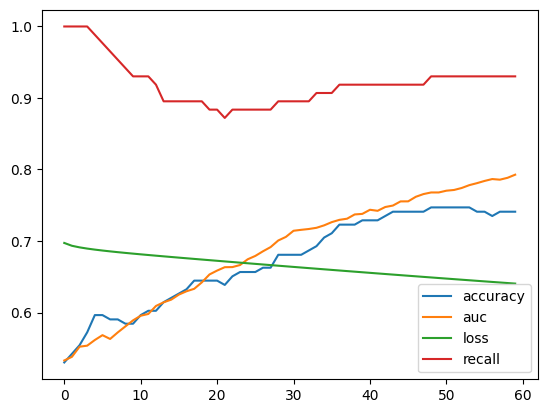

In [95]:
plt.plot(experiment['epochs_run'], experiment['metrics_history']['accuracy'], label = 'accuracy')
plt.plot(experiment['epochs_run'], experiment['metrics_history']['auc'], label = 'auc')
plt.plot(experiment['epochs_run'], experiment['metrics_history']['loss'], label = 'loss')
plt.plot(experiment['epochs_run'], experiment['metrics_history']['recall'], label = 'recall')
plt.legend()


In [98]:
test_features_dict = {
    feature_name: np.array(test_features[feature_name], dtype=np.float32)
    for feature_name in input_features
}


In [99]:
accuracy_test, auc_test, loss_test, precision_test, recall_test = experiment['model'].evaluate(x=test_features_dict, y=test_label, batch_size=batch_size, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step - accuracy: 0.7619 - auc: 0.7753 - loss: 0.6416 - precision: 0.7586 - recall: 0.8800


In [100]:
accuracy_train, auc_train, loss_train, precision_train, recall_train = list(experiment['metrics_history'].to_numpy()[-1])

In [101]:
print('Comparing Metrics between Train and test')
print('-------------')
print('Train Accuracy', round(float(accuracy_train),4))
print('Test Accuracy', round(float(accuracy_test),4))
print('-------------')
print('Train AUC', round(float(auc_train),4))
print('Test AUC', round(float(auc_test),4))
print('-------------')
print('Train Loss', round(float(loss_train),4))
print('Test Loss', round(float(loss_test),4))
print('-------------')
print('Train Precision', round(float(precision_train),4))
print('Test Precision', round(float(precision_test),4))
print('-------------')
print('Train Recall', round(float(recall_train),4))
print('Test Recall', round(float(recall_test),4))
print('-------------')

Comparing Metrics between Train and test
-------------
Train Accuracy 0.741
Test Accuracy 0.6416
-------------
Train AUC 0.7927
Test AUC 0.7619
-------------
Train Loss 0.6404
Test Loss 0.7586
-------------
Train Precision 0.6838
Test Precision 0.88
-------------
Train Recall 0.9302
Test Recall 0.7753
-------------


Using Normal Logestic Regression

In [106]:
X = shuffled_df.iloc[:, :-1].values
y = shuffled_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [107]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [108]:
y_pred = log_reg.predict(X_test)

In [109]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]]


In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12 10]
 [ 3 17]]


0.6904761904761905